# House predictions with linear regression

In [140]:
import turicreate as tc

In [197]:
data = tc.SFrame('Hyderabad.csv')
data = data.remove_column('Location')
data = data[data['Price']<100000000]
data

Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.026911 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.02833 secs.

Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack
6968000,1340,2,0,0,1,1,1,1
29000000,3498,4,0,0,1,1,1,1
6590000,1318,2,0,0,1,0,0,0
5739000,1295,3,1,0,0,0,0,0
5679000,1145,2,0,0,0,0,1,0
6099000,1230,2,0,0,0,0,0,0
7000000,1350,2,0,0,0,0,0,0
4198000,1400,3,0,0,1,1,0,0
9900000,2240,3,0,0,1,1,0,0
9800000,1520,2,1,0,0,0,0,0


In [198]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2391

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003496     | 46768985.693526    | 20954637.634029      | 3950661.172076                  | 4318739.280711                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [199]:
model.coefficients

name,index,value,stderr
(intercept),None,-1106506.003071595,nan
Area,None,2586.772287257074,nan
No. of Bedrooms,None,-355997.96266028273,nan
Resale,None,285081.83136055176,nan
MaintenanceStaff,None,-283740.95986066514,nan
Gymnasium,None,-310670.83028880635,nan
SwimmingPool,None,180906.81900411798,nan
LandscapedGardens,None,273274.6914011647,nan
JoggingTrack,None,-126023.42453978978,nan
RainWaterHarvesting,None,-113369.33304299487,nan


In [200]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2391

Number of features          : 38

Number of unpacked features : 38

Number of coefficients    : 39

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.034336     | 45537461.336053    | 18561559.823207      | 3772457.490852                  | 3340911.301516                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [201]:
model.coefficients

name,index,value,stderr
(intercept),None,-4279235.450000467,358375.4940666913
Area,None,10286.998647607825,181.7235720186711
No. of Bedrooms,None,-1437131.9531021211,191216.77140507541
Resale,None,1499776.6991506068,206908.31306373267
MaintenanceStaff,None,-1115053.0321971695,310420.24840505735
Gymnasium,None,-1025154.5883946379,425674.7669141083
SwimmingPool,None,747729.9338965276,399214.6633270115
LandscapedGardens,None,962909.1094183532,344185.62147090567
JoggingTrack,None,-233250.22826892903,360709.72018456156
RainWaterHarvesting,None,-550723.0285815811,319754.8260684514


In [202]:
data['Predictions'] = model.predict(data)

In [203]:
data['Price', 'Predictions']

Price,Predictions
6968000,8770099.11677415
29000000,28481653.901568986
6590000,6730083.068329725
5739000,6637523.571546858
5679000,7208491.922293941
6099000,5906223.913403865
7000000,6473696.561715635
4198000,6922135.982889289
9900000,16628513.769164069
9800000,10389230.22036074


In [210]:
data[10]

{'Price': 8903000,
 'Area': 1535,
 'No. of Bedrooms': 3,
 'Resale': 0,
 'MaintenanceStaff': 1,
 'Gymnasium': 1,
 'SwimmingPool': 1,
 'LandscapedGardens': 1,
 'JoggingTrack': 1,
 'RainWaterHarvesting': 1,
 'IndoorGames': 1,
 'ShoppingMall': 0,
 'Intercom': 1,
 'SportsFacility': 0,
 'ATM': 0,
 'ClubHouse': 1,
 'School': 0,
 '24X7Security': 1,
 'PowerBackup': 1,
 'CarParking': 1,
 'StaffQuarter': 1,
 'Cafeteria': 0,
 'MultipurposeRoom': 1,
 'Hospital': 0,
 'WashingMachine': 0,
 'Gasconnection': 0,
 'AC': 0,
 'Wifi': 0,
 "Children'splayarea": 1,
 'LiftAvailable': 1,
 'BED': 0,
 'VaastuCompliant': 1,
 'Microwave': 0,
 'GolfCourse': 0,
 'TV': 0,
 'DiningTable': 0,
 'Sofa': 0,
 'Wardrobe': 0,
 'Refrigerator': 0,
 'Predictions': 8179561.6017253045}

In [215]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [216]:
model.predict(house)

dtype: float
Rows: 1
[2594841.41020076]

In [204]:
simple_data = data['Price', 'Area']
simple_data

Price,Area
6968000,1340
29000000,3498
6590000,1318
5739000,1295
5679000,1145
6099000,1230
7000000,1350
4198000,1400
9900000,2240
9800000,1520


In [205]:
from matplotlib import pyplot as plt

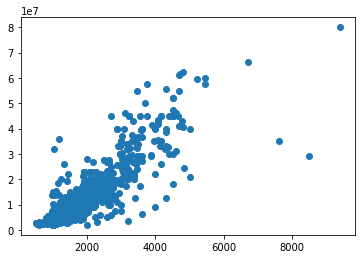

In [206]:
plt.scatter(data['Area'], data['Price'])

In [29]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 5896

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003876     | 294803811.416366   | 119589397.514978     | 13068349.420330                 | 10333592.206123                   |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [139]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-532020.0075365268,378742.5133242014
Area,None,7297.0810078600725,221.17245074453362


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.023008 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.026264 secs.

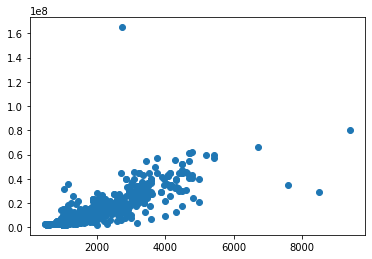

In [129]:
# Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai
d = tc.SFrame('Hyderabad.csv')
plt.scatter(d['Area'], d['Price'])

In [122]:
data.sort('Price', ascending=False)

Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack
165000000,2750,3,0,0,0,0,0,0
80000000,9400,8,1,0,1,1,0,1
66400000,6718,5,0,0,1,1,1,1
62300000,4800,4,0,1,1,1,1,1
61400000,4730,4,1,0,0,0,0,0
61000000,4700,4,0,1,1,1,1,1
60000000,5440,4,1,1,1,1,1,1
59600000,5200,3,0,0,1,1,1,1
57500000,3765,4,1,0,1,1,1,1
57500000,5440,4,1,0,1,1,1,1


In [190]:
kdata = tc.SFrame('kc_house_data.csv')
kdata = kdata.remove_column('date')
kdata = kdata.remove_column('id')
kdata

Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.133303 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.094787 secs.

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180
538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170
180000.0,2,1.0,770,10000,1.0,0,0,3,6,770
604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050
510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680
1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890
257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715
291850.0,3,1.5,1060,9711,1.0,0,0,3,7,1060
229500.0,3,1.0,1780,7470,1.0,0,0,3,7,1050
323000.0,3,2.5,1890,6560,2.0,0,0,3,7,1890


In [192]:
kmodel = tc.linear_regression.create(kdata, target='price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 20532

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 19

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.203362     | 4348199.279748     | 2040950.641356       | 201125.441980                   | 221101.271319                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [193]:
kmodel.coefficients

name,index,value,stderr
(intercept),None,-18991611.82458982,3002199.136634374
bedrooms,None,-35117.7309556727,1935.2758582897031
bathrooms,None,40282.00392214336,3337.265839230653
sqft_living,None,78.47297727360866,nan
sqft_lot,None,0.11163067674775101,0.048342885653446445
floors,None,7031.015081979655,3695.978903288049
waterfront,None,594088.9085969737,17808.884683200817
view,None,50899.688284085925,2195.324790564191
condition,None,29726.332419849987,2412.497855248494
grade,None,99393.40615143171,2207.4209770744437
